# Movimiento Armónico Simple (MAS)

## Introducción

El Movimiento Armónico Simple es un tipo de movimiento oscilatorio que describe muchos fenómenos físicos importantes, como:
- Péndulos simples (para ángulos pequeños)
- Masas unidas a resortes
- Oscilaciones moleculares
- Circuitos eléctricos LC

En este notebook exploraremos las ecuaciones fundamentales del MAS, crearemos visualizaciones y analizaremos las propiedades energéticas del sistema.

## 1. Instalación de Librerías Necesarias

Si es la primera vez que ejecutas este notebook, es posible que necesites instalar algunas librerías. Ejecuta la siguiente celda para instalar todas las dependencias necesarias:

In [3]:
# Instalar librerías necesarias (ejecutar solo si es necesario)
import subprocess
import sys

# Lista de librerías requeridas
required_packages = [
    'numpy',
    'matplotlib',
    'ipython'
]

def install_package(package):
    """Instala un paquete usando pip"""
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

def check_and_install_packages():
    """Verifica e instala paquetes si no están disponibles"""
    for package in required_packages:
        try:
            __import__(package)
            print(f"✓ {package} ya está instalado")
        except ImportError:
            print(f"✗ {package} no está instalado. Instalando...")
            install_package(package)
            print(f"✓ {package} instalado exitosamente")

# Ejecutar verificación e instalación
print("Verificando librerías necesarias...")
print("=" * 50)
check_and_install_packages()
print("=" * 50)
print("¡Todas las librerías están listas para usar!")

Verificando librerías necesarias...
✗ numpy no está instalado. Instalando...
✓ numpy instalado exitosamente
✗ matplotlib no está instalado. Instalando...
✓ numpy instalado exitosamente
✗ matplotlib no está instalado. Instalando...
✓ matplotlib instalado exitosamente
✗ ipython no está instalado. Instalando...
✓ matplotlib instalado exitosamente
✗ ipython no está instalado. Instalando...
✓ ipython instalado exitosamente
¡Todas las librerías están listas para usar!
✓ ipython instalado exitosamente
¡Todas las librerías están listas para usar!


### Instalación Manual Alternativa

Si prefieres instalar las librerías manualmente, puedes usar los siguientes comandos en tu terminal o línea de comandos:

```bash
# Para usuarios de pip
pip install numpy matplotlib ipython

# Para usuarios de conda
conda install numpy matplotlib ipython

# Para usuarios de pip en Windows (si hay problemas)
python -m pip install numpy matplotlib ipython
```

**Nota:** Estas librerías generalmente vienen incluidas en distribuciones de Python científico como Anaconda o Miniconda.

## 2. Importar Librerías Necesarias

Una vez que todas las librerías estén instaladas, las importamos y configuramos el entorno de trabajo:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Circle
from IPython.display import HTML

# Configuración para mejorar la calidad de las gráficas
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


## 3. Definir Parámetros del Movimiento Armónico Simple

Las ecuaciones fundamentales del MAS son:

**Posición:** $x(t) = A \cos(\omega t + \phi)$

**Velocidad:** $v(t) = -A\omega \sin(\omega t + \phi)$  

**Aceleración:** $a(t) = -A\omega^2 \cos(\omega t + \phi) = -\omega^2 x(t)$

Donde:
- $A$ = Amplitud (desplazamiento máximo)
- $\omega$ = Frecuencia angular (rad/s)
- $\phi$ = Constante de fase (rad)
- $T = \frac{2\pi}{\omega}$ = Período
- $f = \frac{1}{T} = \frac{\omega}{2\pi}$ = Frecuencia

In [5]:
# Parámetros del sistema
A = 2.0          # Amplitud (metros)
omega = 2.0      # Frecuencia angular (rad/s)
phi = np.pi/4    # Constante de fase (radianes)
mass = 1.0       # Masa del objeto (kg) - para cálculos de energía

# Parámetros calculados
T = 2 * np.pi / omega                    # Período
f = 1 / T                                # Frecuencia
k = mass * omega**2                      # Constante del resorte

# Crear array de tiempo (3 períodos completos)
t_max = 3 * T
dt = 0.01
t = np.arange(0, t_max, dt)

print(f"Parámetros del sistema:")
print(f"Amplitud (A) = {A} m")
print(f"Frecuencia angular (ω) = {omega} rad/s")
print(f"Constante de fase (φ) = {phi:.2f} rad = {np.degrees(phi):.1f}°")
print(f"Período (T) = {T:.2f} s")
print(f"Frecuencia (f) = {f:.2f} Hz")
print(f"Constante del resorte (k) = {k} N/m")

Parámetros del sistema:
Amplitud (A) = 2.0 m
Frecuencia angular (ω) = 2.0 rad/s
Constante de fase (φ) = 0.79 rad = 45.0°
Período (T) = 3.14 s
Frecuencia (f) = 0.32 Hz
Constante del resorte (k) = 4.0 N/m


## 4. Calcular Posición como Función del Tiempo

In [6]:
# Calcular posición en función del tiempo
x = A * np.cos(omega * t + phi)

print(f"Posición calculada para {len(t)} puntos de tiempo")
print(f"Posición inicial x(0) = {x[0]:.3f} m")
print(f"Posición máxima = {np.max(x):.3f} m")
print(f"Posición mínima = {np.min(x):.3f} m")

Posición calculada para 943 puntos de tiempo
Posición inicial x(0) = 1.414 m
Posición máxima = 2.000 m
Posición mínima = -2.000 m


## 5. Calcular Velocidad y Aceleración

In [7]:
# Calcular velocidad (derivada de la posición)
v = -A * omega * np.sin(omega * t + phi)

# Calcular aceleración (derivada de la velocidad)
a = -A * omega**2 * np.cos(omega * t + phi)

# Verificar que a = -ω²x
a_check = -omega**2 * x

print("Velocidad y aceleración calculadas")
print(f"Velocidad inicial v(0) = {v[0]:.3f} m/s")
print(f"Aceleración inicial a(0) = {a[0]:.3f} m/s²")
print(f"Velocidad máxima = {np.max(np.abs(v)):.3f} m/s")
print(f"Aceleración máxima = {np.max(np.abs(a)):.3f} m/s²")
print(f"Verificación: a = -ω²x es correcta: {np.allclose(a, a_check)}")

Velocidad y aceleración calculadas
Velocidad inicial v(0) = -2.828 m/s
Aceleración inicial a(0) = -5.657 m/s²
Velocidad máxima = 4.000 m/s
Aceleración máxima = 8.000 m/s²
Verificación: a = -ω²x es correcta: True


## 6. Gráfica de Posición vs Tiempo

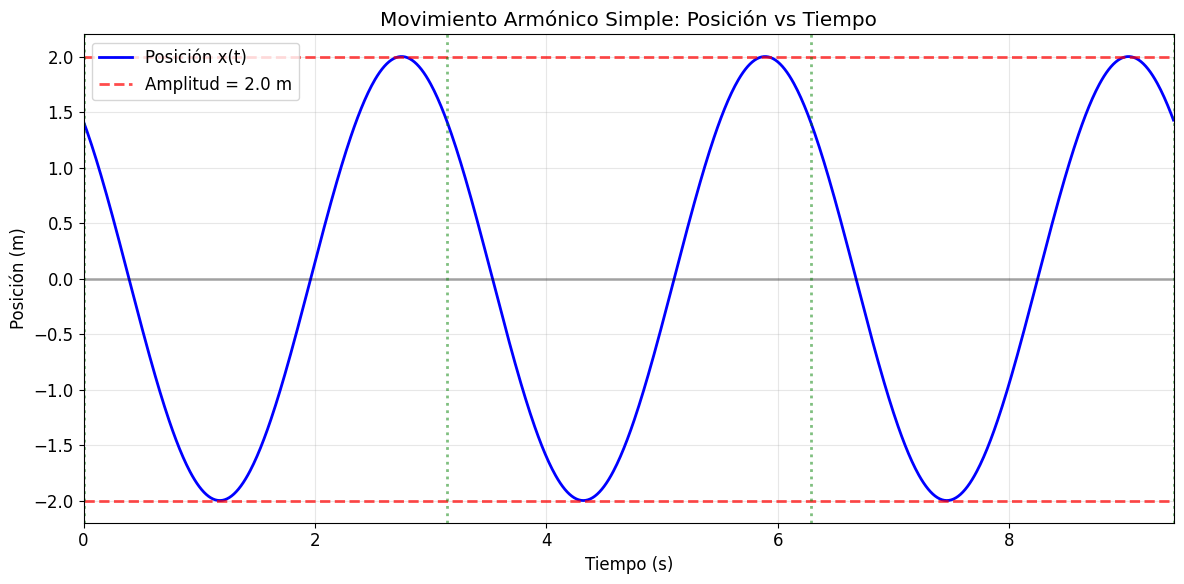

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(t, x, 'b-', label='Posición x(t)', linewidth=2)
plt.axhline(y=A, color='r', linestyle='--', alpha=0.7, label=f'Amplitud = {A} m')
plt.axhline(y=-A, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Marcar algunos períodos
for i in range(int(t_max/T) + 1):
    plt.axvline(x=i*T, color='g', linestyle=':', alpha=0.5)

plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Movimiento Armónico Simple: Posición vs Tiempo')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, t_max)
plt.tight_layout()
plt.show()

## 7. Gráfica de Velocidad vs Tiempo

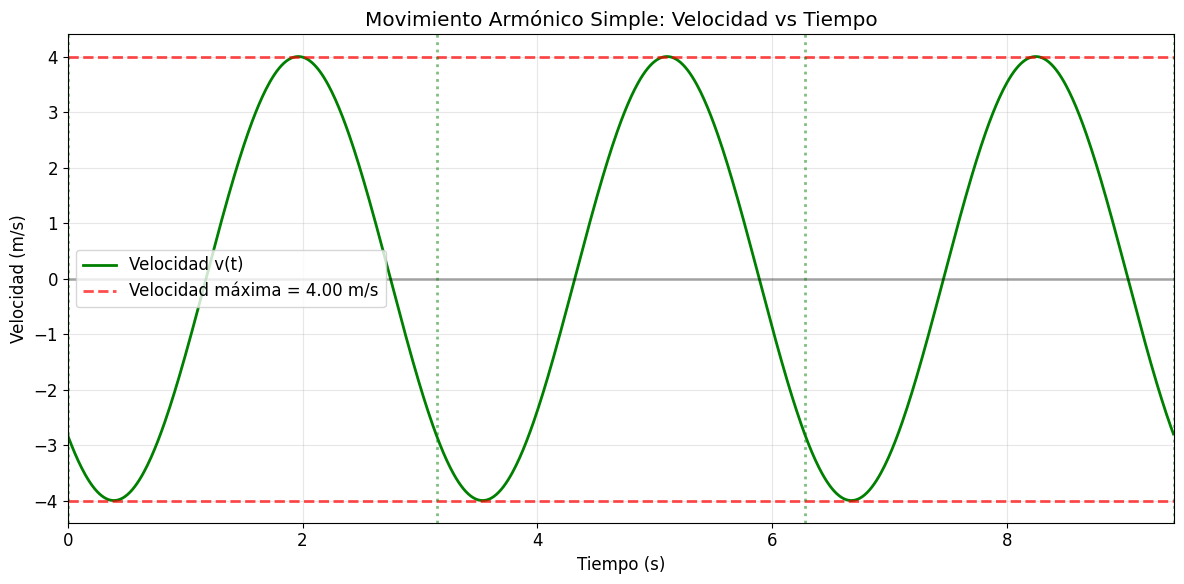

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(t, v, 'g-', label='Velocidad v(t)', linewidth=2)
v_max = A * omega
plt.axhline(y=v_max, color='r', linestyle='--', alpha=0.7, label=f'Velocidad máxima = {v_max:.2f} m/s')
plt.axhline(y=-v_max, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Marcar algunos períodos
for i in range(int(t_max/T) + 1):
    plt.axvline(x=i*T, color='g', linestyle=':', alpha=0.5)

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Movimiento Armónico Simple: Velocidad vs Tiempo')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, t_max)
plt.tight_layout()
plt.show()

## 8. Gráfica de Aceleración vs Tiempo

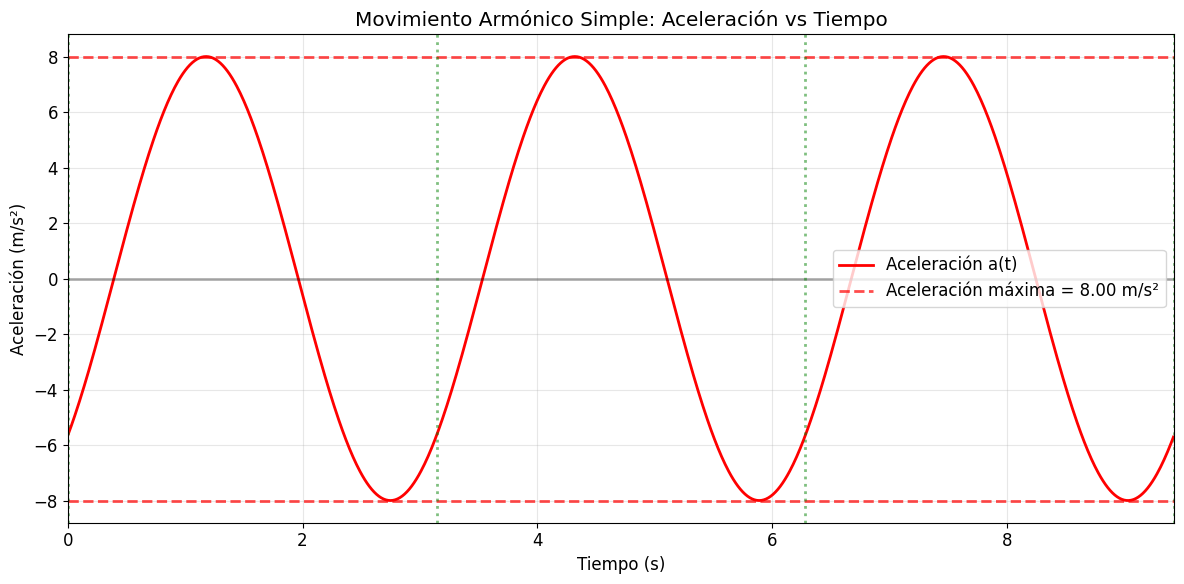

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(t, a, 'r-', label='Aceleración a(t)', linewidth=2)
a_max = A * omega**2
plt.axhline(y=a_max, color='r', linestyle='--', alpha=0.7, label=f'Aceleración máxima = {a_max:.2f} m/s²')
plt.axhline(y=-a_max, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)

# Marcar algunos períodos
for i in range(int(t_max/T) + 1):
    plt.axvline(x=i*T, color='g', linestyle=':', alpha=0.5)

plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s²)')
plt.title('Movimiento Armónico Simple: Aceleración vs Tiempo')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, t_max)
plt.tight_layout()
plt.show()

## 9. Diagrama de Espacio de Fase

El espacio de fase muestra la relación entre posición y velocidad, creando una trayectoria elíptica característica del MAS.

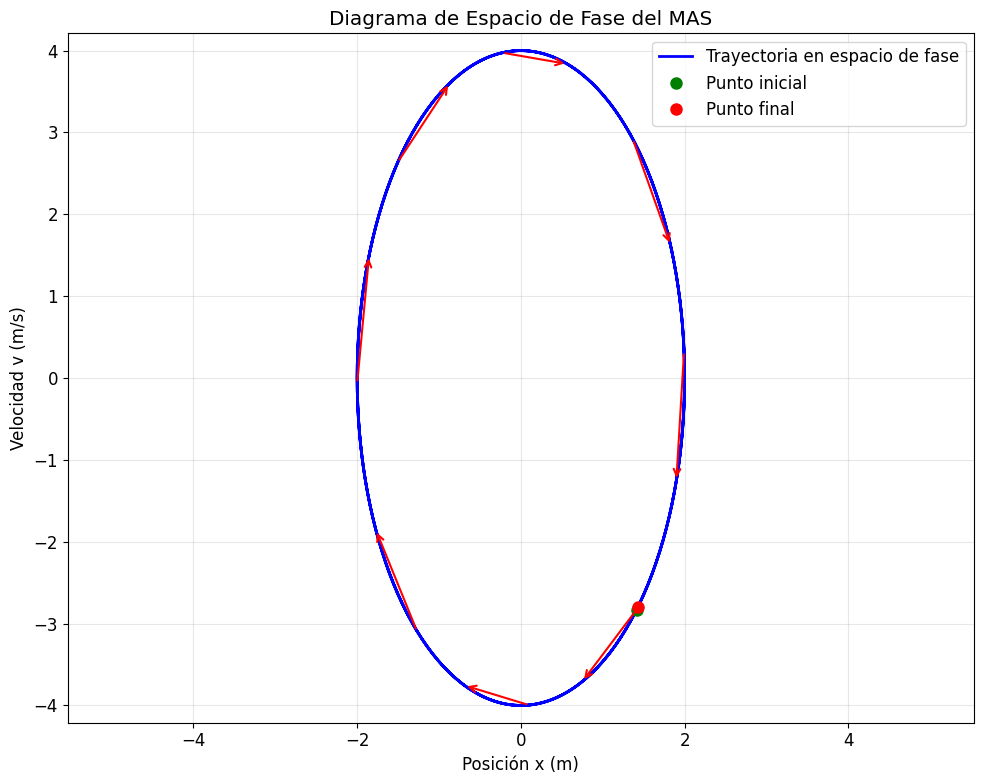

El diagrama muestra una elipse en el espacio de fase.
La dirección del movimiento es en sentido horario.


In [11]:
plt.figure(figsize=(10, 8))
plt.plot(x, v, 'b-', linewidth=2, label='Trayectoria en espacio de fase')
plt.plot(x[0], v[0], 'go', markersize=8, label='Punto inicial')
plt.plot(x[-1], v[-1], 'ro', markersize=8, label='Punto final')

# Agregar flechas para mostrar la dirección del movimiento
n_arrows = 8
for i in range(0, len(x), len(x)//n_arrows):
    if i + 20 < len(x):
        plt.annotate('', xy=(x[i+20], v[i+20]), xytext=(x[i], v[i]),
                    arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

plt.xlabel('Posición x (m)')
plt.ylabel('Velocidad v (m/s)')
plt.title('Diagrama de Espacio de Fase del MAS')
plt.grid(True, alpha=0.3)
plt.legend()
plt.axis('equal')
plt.tight_layout()
plt.show()

print("El diagrama muestra una elipse en el espacio de fase.")
print("La dirección del movimiento es en sentido horario.")

## 10. Animación del Movimiento

Creamos una animación que muestra la masa oscilando y el correspondiente gráfico de posición vs tiempo.

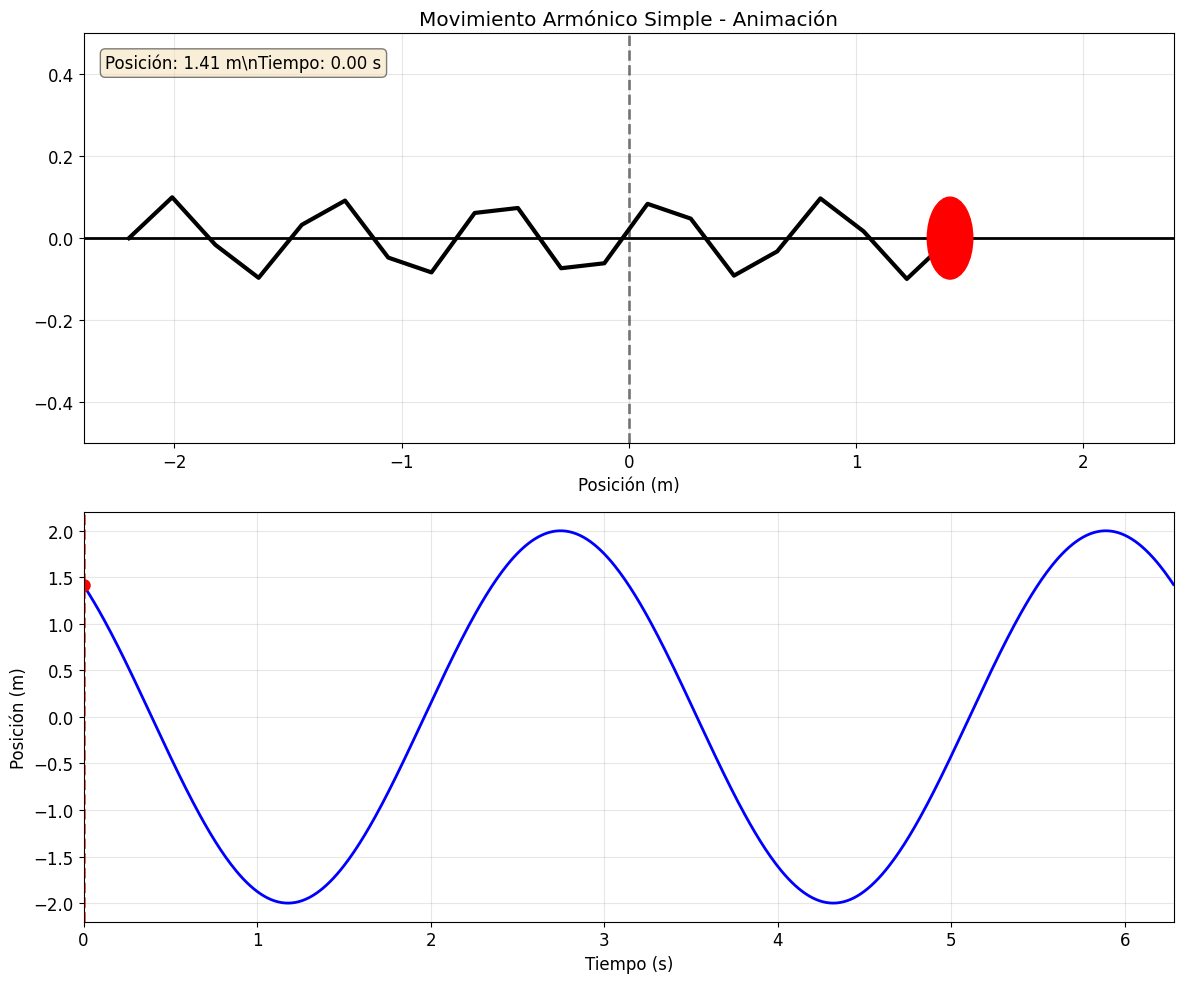

In [12]:
# Crear animación
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Configurar el subplot superior (animación de la masa)
ax1.set_xlim(-A*1.2, A*1.2)
ax1.set_ylim(-0.5, 0.5)
ax1.set_xlabel('Posición (m)')
ax1.set_title('Movimiento Armónico Simple - Animación')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='k', linewidth=2)
ax1.axvline(x=0, color='k', linestyle='--', alpha=0.5)

# Crear objetos para la animación
mass = Circle((0, 0), 0.1, color='red', zorder=5)
ax1.add_patch(mass)
spring_line, = ax1.plot([], [], 'k-', linewidth=3, label='Resorte')
position_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes, fontsize=12,
                        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Configurar el subplot inferior (gráfico de posición vs tiempo)
ax2.set_xlim(0, 2*T)
ax2.set_ylim(-A*1.1, A*1.1)
ax2.set_xlabel('Tiempo (s)')
ax2.set_ylabel('Posición (m)')
ax2.grid(True, alpha=0.3)
position_line, = ax2.plot([], [], 'b-', linewidth=2, label='x(t)')
current_point, = ax2.plot([], [], 'ro', markersize=8)
time_line = ax2.axvline(x=0, color='r', linestyle='--', alpha=0.7)

# Función de animación
def animate(frame):
    # Calcular el tiempo actual
    current_time = frame * dt
    if current_time >= 2*T:
        current_time = current_time % (2*T)
    
    # Calcular posición actual
    current_x = A * np.cos(omega * current_time + phi)
    
    # Actualizar la masa
    mass.center = (current_x, 0)
    
    # Actualizar el resorte (línea en zigzag simplificada)
    spring_x = np.linspace(-A*1.1, current_x, 20)
    spring_y = 0.1 * np.sin(10 * np.pi * np.linspace(0, 1, 20))
    spring_line.set_data(spring_x, spring_y)
    
    # Actualizar texto de posición
    position_text.set_text(f'Posición: {current_x:.2f} m\\nTiempo: {current_time:.2f} s')
    
    # Actualizar gráfico de posición vs tiempo
    t_plot = t[t <= 2*T]
    x_plot = x[:len(t_plot)]
    position_line.set_data(t_plot, x_plot)
    current_point.set_data([current_time], [current_x])
    time_line.set_xdata([current_time, current_time])
    
    return mass, spring_line, position_text, position_line, current_point, time_line

# Crear y mostrar la animación
frames = int(2*T / dt)
anim = animation.FuncAnimation(fig, animate, frames=frames, interval=50, blit=True, repeat=True)

plt.tight_layout()
plt.show()

# Para mostrar la animación en Jupyter, descomenta la siguiente línea:
# HTML(anim.to_jshtml())

## 11. Análisis de Energía

En el MAS, la energía se conserva y se intercambia continuamente entre energía cinética y potencial:

**Energía Cinética:** $E_k = \frac{1}{2}mv^2$

**Energía Potencial:** $E_p = \frac{1}{2}kx^2$

**Energía Total:** $E = E_k + E_p = \frac{1}{2}kA^2 = \text{constante}$

In [13]:
# Calcular las energías
E_kinetic = 0.5 * mass * v**2          # Energía cinética
E_potential = 0.5 * k * x**2           # Energía potencial
E_total = E_kinetic + E_potential      # Energía total
E_total_theoretical = 0.5 * k * A**2   # Energía total teórica

# Crear gráfico de energías
plt.figure(figsize=(14, 10))

# Subplot 1: Energías vs tiempo
plt.subplot(2, 2, 1)
plt.plot(t, E_kinetic, 'g-', label='Energía Cinética', linewidth=2)
plt.plot(t, E_potential, 'r-', label='Energía Potencial', linewidth=2)
plt.plot(t, E_total, 'b--', label='Energía Total', linewidth=2)
plt.axhline(y=E_total_theoretical, color='k', linestyle=':', 
            label=f'E total teórica = {E_total_theoretical:.3f} J')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía (J)')
plt.title('Energías vs Tiempo')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Energía cinética vs posición
plt.subplot(2, 2, 2)
plt.plot(x, E_kinetic, 'g-', linewidth=2)
plt.xlabel('Posición (m)')
plt.ylabel('Energía Cinética (J)')
plt.title('Energía Cinética vs Posición')
plt.grid(True, alpha=0.3)

# Subplot 3: Energía potencial vs posición
plt.subplot(2, 2, 3)
plt.plot(x, E_potential, 'r-', linewidth=2)
plt.xlabel('Posición (m)')
plt.ylabel('Energía Potencial (J)')
plt.title('Energía Potencial vs Posición')
plt.grid(True, alpha=0.3)

# Subplot 4: Diagrama de barras de energías en diferentes momentos
plt.subplot(2, 2, 4)
times_check = [0, T/4, T/2, 3*T/4, T]
indices = [int(time/dt) for time in times_check]
positions = [x[i] for i in indices]
Ek_values = [E_kinetic[i] for i in indices]
Ep_values = [E_potential[i] for i in indices]

x_pos = np.arange(len(times_check))
width = 0.35

plt.bar(x_pos - width/2, Ek_values, width, label='E. Cinética', color='green', alpha=0.7)
plt.bar(x_pos + width/2, Ep_values, width, label='E. Potencial', color='red', alpha=0.7)

plt.xlabel('Momento del ciclo')
plt.ylabel('Energía (J)')
plt.title('Distribución de Energía en Diferentes Momentos')
plt.xticks(x_pos, [f't={time:.2f}s\\nx={pos:.2f}m' for time, pos in zip(times_check, positions)])
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Verificar conservación de energía
print("Análisis de Conservación de Energía:")
print(f"Energía total teórica: {E_total_theoretical:.6f} J")
print(f"Energía total promedio: {np.mean(E_total):.6f} J")
print(f"Desviación estándar de E_total: {np.std(E_total):.8f} J")
print(f"Variación máxima: {np.max(E_total) - np.min(E_total):.8f} J")
print(f"La energía se conserva: {np.allclose(E_total, E_total_theoretical, rtol=1e-10)}")

TypeError: unsupported operand type(s) for *: 'float' and 'Circle'

## Conclusiones

Este notebook ha demostrado las características fundamentales del Movimiento Armónico Simple:

### Aspectos Clave:

1. **Ecuaciones de Movimiento**: La posición, velocidad y aceleración siguen funciones trigonométricas con relaciones de fase específicas.

2. **Proporcionalidad**: La aceleración es siempre proporcional y opuesta al desplazamiento: $a = -\omega^2 x$

3. **Espacio de Fase**: La trayectoria en el espacio de fase es una elipse, característica de sistemas conservativos.

4. **Conservación de Energía**: La energía total se mantiene constante, intercambiándose continuamente entre cinética y potencial.

5. **Periodicidad**: El movimiento se repite exactamente cada período $T = \frac{2\pi}{\omega}$

### Aplicaciones Prácticas:

- Diseño de resortes y sistemas de suspensión
- Análisis de oscilaciones en estructuras
- Circuitos resonantes en electrónica
- Modelos de osciladores cuánticos
- Sistemas de control y estabilidad

### Parámetros Utilizados en este Ejemplo:
- Amplitud: {A} m
- Frecuencia angular: {omega} rad/s
- Período: {T:.2f} s
- Constante de fase: {np.degrees(phi):.1f}°

## Ejercicios Adicionales

### Ejercicio 1: Modificar Parámetros
Cambia los valores de amplitud (A), frecuencia angular (ω) y fase (φ) en la celda de parámetros y ejecuta nuevamente el notebook para observar cómo cambian las gráficas.

### Ejercicio 2: Comparar Dos Osciladores
Modifica el código para mostrar dos MAS con diferentes parámetros en la misma gráfica y compara sus comportamientos.

### Ejercicio 3: Análisis de Resonancia
Investiga qué sucede cuando cambias la frecuencia natural del sistema y cómo esto afecta la respuesta.

### Ejercicio 4: Amortiguamiento
Extiende el modelo para incluir amortiguamiento: $a = -\omega^2 x - 2\gamma v$

¡Experimenta con diferentes valores y observa los resultados!